power time domain = 0.499998
power frequency domain = 0.499998


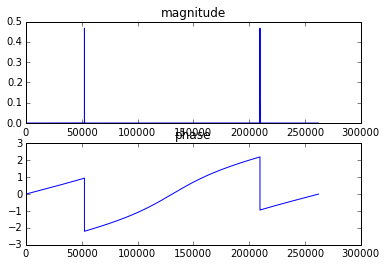

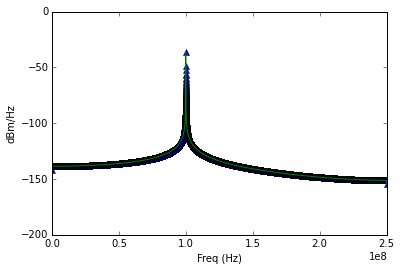

In [2]:
%matplotlib inline
# FFT normalization to conserve power

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal


sample_rate = 500.0e6
time_step = 1/sample_rate

carrier_freq = 100.0e6


# number of digital samples to simulate
num_samples = 2**18 # 262144
t_stop = num_samples*time_step
t = np.arange(0, t_stop, time_step)

# let the signal be a voltage waveform,
# so there is no zero padding
carrier_I = np.sin(2*np.pi*carrier_freq*t)

#######################################################
# FFT using Welch method
# windows = np.ones(nfft) - no windowing
# if windows = 'hamming', etc.. this function will
# normalize to an equivalent noise bandwidth (ENBW)
#######################################################
nfft = num_samples  # fft size same as signal size 
f,Pxx_den = scipy.signal.welch(carrier_I, fs = 1/time_step,\
                    window = np.ones(nfft),\
                    nperseg = nfft,\
                    scaling='density')


###############################################################################
# FFT comparison
###############################################################################

integration_time = nfft*time_step
power_time_domain = sum((np.abs(carrier_I)**2)*time_step)/integration_time
print ('power time domain = %f' % power_time_domain)

# Take FFT.  Note that the factor of 1/nfft is sometimes omitted in some 
# references and software packages.
# By proving Parseval's theorem (conservation of energy) we can find out the 
# proper normalization.
signal = carrier_I 
xdft = scipy.fftpack.fft(signal, nfft)/nfft 
# fft coefficients need to be scaled by fft size
# equivalent to scaling over frequency bins
# total power in frequency domain should equal total power in time domain
power_freq_domain = sum(np.abs(xdft)**2)
print('power frequency domain = %f' % power_freq_domain)
# Energy is conserved


# FFT symmetry
plt.figure(0)
plt.subplot(2,1,1)
plt.plot(np.abs(xdft)) # symmetric in amplitude
plt.title('magnitude')
plt.subplot(2,1,2) 
plt.plot(np.angle(xdft)) # pi phase shift out of phase
plt.title('phase')
plt.show()

xdft_short = xdft[0:nfft/2+1] # take only positive frequency terms, other half identical
# xdft[0] is the dc term
# xdft[nfft/2] is the Nyquist term, note that Python 2.X indexing does NOT 
# include the last element, therefore we need to use 0:nfft/2+1 to have an array
# that is from 0 to nfft/2
# xdft[nfft/2-x] = conjugate(xdft[nfft/2+x])
Pxx = (np.abs(xdft_short))**2 # power ~ voltage squared, power in each bin.
Pxx_density = Pxx / (sample_rate/nfft)  # power is energy over -fs/2 to fs/2, with nfft bins
Pxx_density[1:-1] = 2*Pxx_density[1:-1] # conserve power since we threw away 1/2 the spectrum
# note that DC (0 frequency) and Nyquist term only appear once, we don't double those.
# Note that Python 2.X array indexing is not inclusive of the last element.



Pxx_density_dB = 10*np.log10(Pxx_density)
freq = np.linspace(0,sample_rate/2,nfft/2+1) 
# frequency range of the fft spans from DC (0 Hz) to 
# Nyquist (Fs/2).
# the resolution of the FFT is 1/t_stop
# dft of size nfft will give nfft points at frequencies
# (1/stop) to (nfft/2)*(1/t_stop)

plt.figure(1)
plt.plot(freq,Pxx_density_dB,'^')
plt.figure(1)
plt.plot(f, 10.0*np.log10(Pxx_den))
plt.xlabel('Freq (Hz)'),plt.ylabel('dBm/Hz'),#plt.show()
plt.ylim([-200, 0])
plt.show()

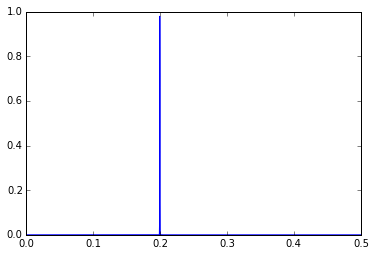

In [34]:
# Windown and zero padding normalization
ample_rate = 500.0e6
time_step = 1 / sample_rate

carrier_freq = 100.0e6


# number of digital samples to simulate
num_samples = 4e3 # 262144
nfft = 2 ** np.ceil(np.log2(num_samples))  # fft size same as signal size 

window = np.kaiser(num_samples, 2.5 * np.pi)
window_cg = np.sum(window) / num_samples

t = np.arange(0, num_samples) * time_step

# let the signal be a voltage waveform,
# so there is no zero padding
carrier_I = np.sin(2*np.pi*carrier_freq*t)

# Take FFT.  Note that the factor of 1/nfft is sometimes omitted in some 
# references and software packages.
# By proving Parseval's theorem (conservation of energy) we can find out the 
# proper normalization.
signal = window * carrier_I
xdft = 2 * np.fft.rfft(signal, np.int(nfft)) / (window_cg * num_samples)
f = np.arange(nfft/2 + 1) / nfft

_ = plt.plot(f, np.abs(xdft))